In [2]:
from aicsimageio import AICSImage
import src.data.constants as c
import src.data.utils.utils as utils
import os.path as osp
import os
from matplotlib import pyplot as plt
import numpy as np
import dask
import pickle
import os.path as osp
import warnings
np.random.seed(42)
import dask
warnings.filterwarnings('ignore', '.*PerformanceWarning.*')

In [3]:
data_dir = c.DATA_DIR if osp.exists(
    c.DATA_DIR) else '~/cell/data/interim'

file = 'LI_2019-02-05_emb5_pos4'
folder = osp.join('loops', 'test', file)
# cmp_file = 'cmpseq3-pred-0.7-semi-40_2019-02-05_emb5_pos4.tif'
# tif_file = 'cyctpy15-pred-0.7-semi-40_2019-02-05_emb5_pos4.tif'
tif_file = 'cyctpy15-pred-0.7-semi-40_2019-02-05_emb5_pos4.tif'
# cmp_load_path = osp.join(data_dir, 'cyc', folder, cmp_file)
tif_load_path = osp.join(data_dir, folder, tif_file)

# cmp_data = AICSImage(cmp_load_path)
tif_data = AICSImage(tif_load_path)
# cmp_array = utils.get_raw_array(cmp_data, t=0).compute()
tif_array = np.moveaxis(tif_data.get_image_dask_data()[0, :, :, :, :, :], 1, 0)
tif_array_thresh = dask.array.where(tif_array > 0, 255, 0)

Failed to parse XML for the provided file. Error: not well-formed (invalid token): line 1, column 6
/home/gummz/anaconda3/envs/cell/lib/python3.8/site-packages/aicsimageio/aics_image.py:498: PerformanceWarning: Reshaping is producing a large chunk. To accept the large
chunk and silence this warning, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': False}):
    ...     array.reshape(shape)

To avoid creating the large chunks, set the option
    >>> with dask.config.set(**{'array.slicing.split_large_chunks': True}):
    ...     array.reshape(shape)Explictly passing ``limit`` to ``reshape`` will also silence this warning
    >>> array.reshape(shape, limit='128 MiB')
  return self.xarray_dask_data.data


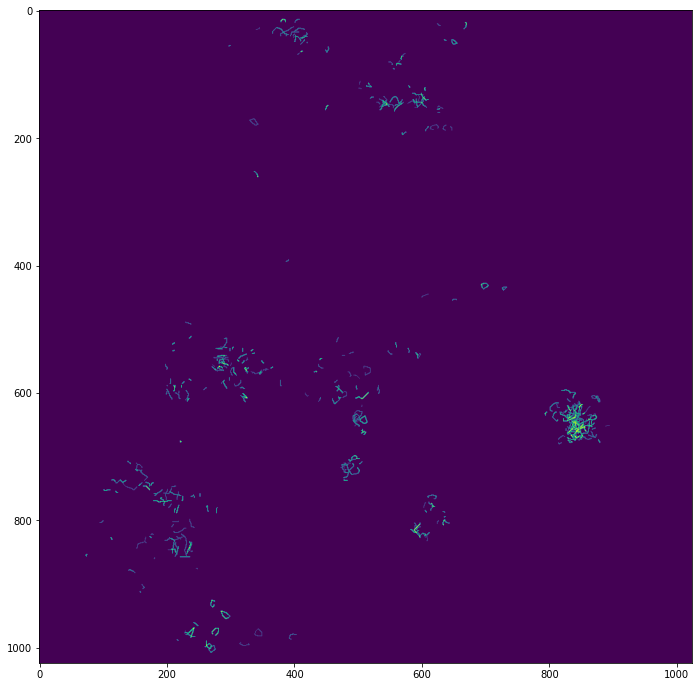

In [5]:
plt.figure(figsize=(15, 12))
plt.imshow(np.max(tif_array, axis=0))
plt.show()

In [4]:
print(np.moveaxis(tif_data.get_image_dask_data()
      [0, :, :, :, :, :], 1, 0).shape)
print(tif_data.dims)


(289, 34, 1024, 1024, 3)
<Dimensions [T: 1, C: 34, Z: 289, Y: 1024, X: 1024, S: 3]>


(289, 34, 1024, 1024, 3)


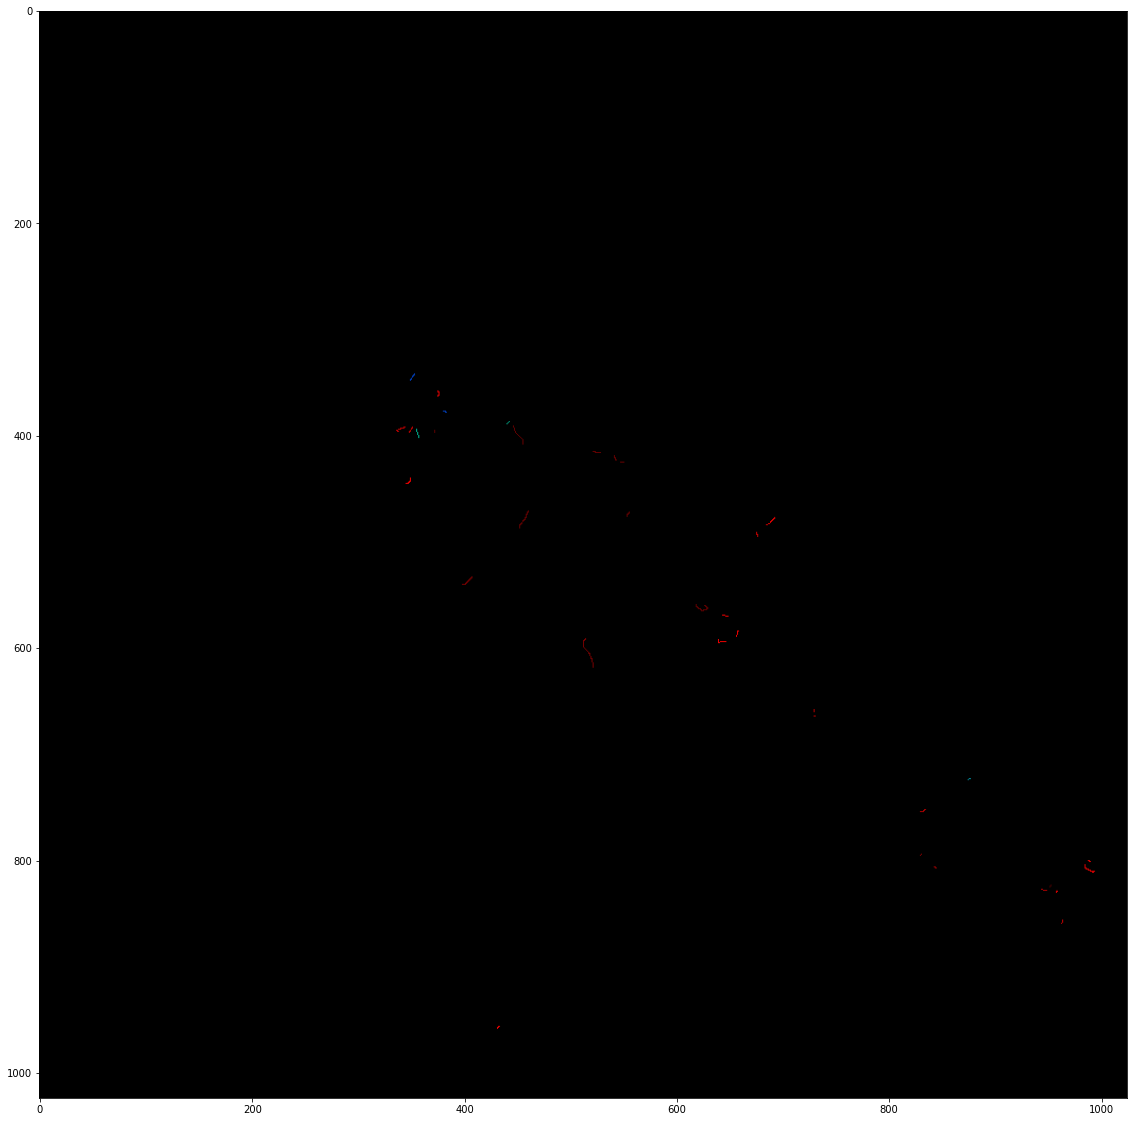

In [6]:
plt.figure(figsize=(20,20))
print(tif_array.shape)
plt.imshow(tif_array[5, 10, :, :, :])


In [25]:
print(tif_data.get_image_dask_data(t=0, c=0).compute().shape)
print(tif_data.dims)


: 

: 

In [5]:
plt.figure(figsize=(20,20), dpi=200)
t_idx = int(np.random.randint(0, tif_array.shape[0]-9, 1))
z_idx = int(np.random.randint(0, tif_array.shape[1]-9, 1))
print(t_idx, z_idx)
for i, array in enumerate(tif_array_thresh[t_idx:(t_idx+9), z_idx:(z_idx+9)]):
    plt.subplot(3, 3, i + 1)
    plt.imshow(array)
plt.show()

102 19


: 

: 

### Loops

In [10]:
data_dir = c.DATA_DIR if osp.exists(
    c.DATA_DIR) else '~/cell/data/interim'

data_file = 'LI_2016-03-04_emb5_pos3'
file_name = 'pred-0.7-semi-40_2016-03-04_emb5_pos3_tp123.cyc'

# cyc = np.load(osp.join(data_dir, 'cyc', data_file, file_name))
# cyc = np.load(
#     '/home/gummz/cell/data/interim/loops/LI_2016-03-04_emb5_pos3/pred-0.7-semi-40_2016-03-04_emb5_pos3_tp123.cyc')

# cyc = pickle.load(open(osp.join(data_dir, 'cyc', data_file, file_name), 'rb'))
cyc = pickle.load(
    open('/home/gummz/cell/data/interim/loops/LI_2016-03-04_emb5_pos3/pred-0.7-semi-40_2016-03-04_emb5_pos3_tp123.cyc', 'rb'))



AttributeError: Can't get attribute 'Cycle' on <module '__main__'>